In [2]:
import numpy as np
import math
import scipy
import xarray as xr
import dask
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.image as imag
import numpy as np
#import matplotlib as mpl

In [192]:
Linear_850 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Linear_Baseline_850_.npy")
VAE_850 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Prediction_850_.npy")
ELBO_VAE_850 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/ELBO_Prediction_850_.npy")
Truth_850 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Truth_850_.npy")
Frequency_850 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Spectral_Frequency_850_.npy")

Linear_750 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Linear_Baseline_750_.npy")
VAE_750 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Prediction_750_.npy")
ELBO_VAE_750 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/ELBO_Prediction_750_.npy")
Truth_750 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Truth_750_.npy")
Frequency_750 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Spectral_Frequency_750_.npy")

Linear_500 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Linear_Baseline_500_.npy")
VAE_500 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Prediction_500_.npy")
ELBO_VAE_500 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/ELBO_Prediction_500_.npy")
Truth_500 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Truth_500_.npy")
Frequency_500 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Spectral_Frequency_500_.npy")

Linear_250 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Linear_Baseline_250_.npy")
VAE_250 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Prediction_250_.npy")
ELBO_VAE_250 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/ELBO_Prediction_250_.npy")
Truth_250 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Truth_250_.npy")
Frequency_250 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Spectral_Frequency_250_.npy")

In [213]:
fz = 15
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

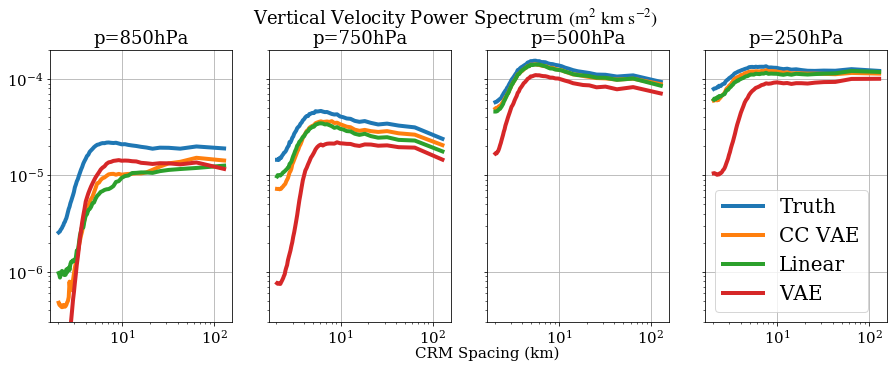

In [262]:
fig, ax = plt.subplots(1,4, figsize=(15,5))

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

ax[0].plot(1/Frequency_850, Truth_850, label="Truth")
ax[0].plot(1/Frequency_850, VAE_850, label="VAE Reconstruction")
ax[0].plot(1/Frequency_850, Linear_850, label="Linear Model")
ax[0].plot(1/Frequency_850, ELBO_VAE_850, label="VAE")
#ax[0,0].legend()
#plt.xlabel("CRM Spacing")
#h = ax[0].set_ylabel(r'$\frac{m^2km}{s^2}$',fontsize = fz)
#h.set_rotation(0)
ax[0].yaxis.set_label_coords(-0.35,0.50)
#ax[0].yaxis.labelpad = 25
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_title("p=850hPa")
ax[0].set_ylim(3e-7, 2e-4)
ax[0].grid()

ax[1].plot(1/Frequency_750, Truth_750, label="Truth")
ax[1].plot(1/Frequency_750, VAE_750, label="VAE Reconstruction")
ax[1].plot(1/Frequency_750, Linear_750, label="Linear Model")
ax[1].plot(1/Frequency_750, ELBO_VAE_750, label="VAE")
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_title("p=750hPa")
ax[1].set_ylim(3e-7, 2e-4)
ax[1].grid()
labels = [item.get_text() for item in ax[1].get_yticklabels()]
empty_string_labels = ['']*len(labels)
ax[1].set_yticklabels(empty_string_labels)

ax[2].plot(1/Frequency_500, Truth_500, label="Truth")
ax[2].plot(1/Frequency_500, VAE_500, label="VAE Reconstruction")
ax[2].plot(1/Frequency_500, Linear_500, label="Linear Model")
ax[2].plot(1/Frequency_500, ELBO_VAE_500, label="VAE")
ax[2].set_xlabel("CRM Spacing (km)")
ax[2].xaxis.set_label_coords(0.0,-0.09)
#h = ax[2].set_ylabel(r'$\frac{m^2km}{s^2}$', fontsize = fz)
#h.set_rotation(0)
#ax[2].yaxis.set_label_coords(-0.2,0.69)
ax[2].yaxis.labelpad = 10
ax[2].set_yscale('log')
ax[2].set_xscale('log')
ax[2].set_title("p=500hPa")
ax[2].set_ylim(3e-7, 2e-4)
ax[2].grid()
labels = [item.get_text() for item in ax[2].get_yticklabels()]
empty_string_labels = ['']*len(labels)
ax[2].set_yticklabels(empty_string_labels)

ax[3].plot(1/Frequency_250, Truth_250, label="Truth")
ax[3].plot(1/Frequency_250, VAE_250, label="CC VAE")
ax[3].plot(1/Frequency_250, Linear_250, label="Linear")
ax[3].plot(1/Frequency_250, ELBO_VAE_250, label="VAE")
ax[3].legend(fontsize=fz*1.33)
#ax[3].set_xlabel("CRM Spacing")
ax[3].set_yscale('log')
ax[3].set_xscale('log')
ax[3].set_title("p=250hPa")
ax[3].set_ylim(3e-7, 2e-4)
ax[3].grid()
labels = [item.get_text() for item in ax[3].get_yticklabels()]
empty_string_labels = ['']*len(labels)
ax[3].set_yticklabels(empty_string_labels)

plt.suptitle("Vertical Velocity Power Spectrum "+r'$\left(\mathrm{m^{2}\ km\ s^{-2}}\right)$', y=1.0001)
plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Log_Spectral_Analysis.png")
plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Paper_Log_Spectral_Analysis.pdf")

In [31]:
def latent_space_analysis(Images, title, iden):
    mean_image = np.mean(Images, axis=0)
    var_image = np.std(Images, axis=0)
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,2, figsize=(16,2))
    cs0 = ax[0].imshow(var_image, cmap=cmap)
    ax[0].set_title("Image Standard Deviation")
    cs1 = ax[1].imshow(mean_image, cmap=cmap)
    ax[1].set_title("Image Mean")
    ax[0].set_ylim(ax[0].get_ylim()[::-1])
    ax[1].set_ylim(ax[1].get_ylim()[::-1])
    ax[1].set_xlabel("CRMs")
    ax[0].set_xlabel("CRMs")
    ax[0].set_ylabel("Pressure")
    ax[1].set_yticks([])
    y_ticks = np.arange(1300, 0, -300)
    ax[0].set_yticklabels(y_ticks)
    ax[1].set_yticklabels(y_ticks)
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs0, cax=cax)
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs1, cax=cax)
    plt.suptitle(title)
    plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space_components/"+iden+'_'+title+'.png')
    
    
#latent_space_analysis(Deep_Images, "K-means Labeled non-convective", idn)

In [33]:
idn = '85'
z_test_tsne = np.load("Saved_Data/Covariance_Perplexity_40_Mean_Var_Latent_Space__83.npy")
#z_test_tsne = np.load("Saved_Data/Latent_Space__"+idn+".npy")
test_labels = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Y_Test.npy")
other_test_labels = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Improved_Y_Test.npy")
test_label_var = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Y_Test_Var.npy")

Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_W_Test.npy")
Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")
Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

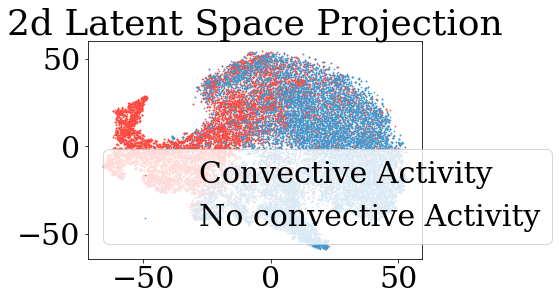

In [34]:
convection = np.squeeze(z_test_tsne[np.where(other_test_labels == 0),:])
no_convection = np.squeeze(z_test_tsne[np.where(other_test_labels == 1),:])
plt.scatter(x=convection[:, 0], y=convection[:, 1], c="#FF4940", s=0.4, label="Convective Activity")
plt.scatter(x=no_convection[:, 0], y=no_convection[:, 1], c="#3D9AD1", s=0.4, label="No convective Activity")
plt.legend()
plt.title("2d Latent Space Projection")
print(" ")

In [36]:
#red no convection
selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > -65, z_test_tsne[:,0] < -50)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -20, z_test_tsne[:,1] < 30)))
no_conv = np.intersect1d(selected_x , selected_y)

#border between red and blue
selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > -5, z_test_tsne[:,0] < 25)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -60, z_test_tsne[:,1] < -40)))
shallow_conv = np.intersect1d(selected_x , selected_y)

#bottom left (dense cluster)
selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > 35, z_test_tsne[:,0] < 55)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -10, z_test_tsne[:,1] < 20)))
deep_conv = np.intersect1d(selected_x , selected_y)

In [37]:
No_Conv_Images = Test_Images[no_conv,:,:]
Shallow_Conv_Images = Test_Images[shallow_conv,:,:]
Deep_Conv_Images = Test_Images[deep_conv,:,:]

In [253]:
def paper_latent_space_analysis(Images, title, iden):
    fz = 40
    lw = 3
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    mean_image = np.mean(Images, axis=0)
    var_image = np.std(Images, axis=0)
    cmap="RdBu_r"
    fig, ax = plt.subplots(figsize=(15,5))
    
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    cs0 = ax.imshow(var_image, cmap=cmap, vmax=1.6, vmin = 0.0)
    #ax.set_title(title)
    #ax.set_title("Vertical Velocity Field Stand Deviation")
    ax.set_ylim(ax.get_ylim()[::-1])
    #ax.set_xlabel("CRMs", fontsize=100)
    #h = ax.set_ylabel("hpa", fontsize=100)
    #h.set_rotation(0)
    #ax.yaxis.labelpad = 90
    #ax.yaxis.set_label_coords(-0.2,0.12)
    ax.set_xticks([])
    ax.set_yticks([])
    #y_ticks = np.arange(1300, 0, -300)
    #ax.set_yticklabels(y_ticks)
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    #cbar = fig.colorbar(cs0, cax=cax)
    #cbar.set_label(r'$\frac{m}{s}$', rotation="horizontal", fontsize = 100, labelpad=50, y=0.95)
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/"+iden+'_'+title+'.png')
    
    
#latent_space_analysis(Deep_Images, "K-means Labeled non-convective", idn)

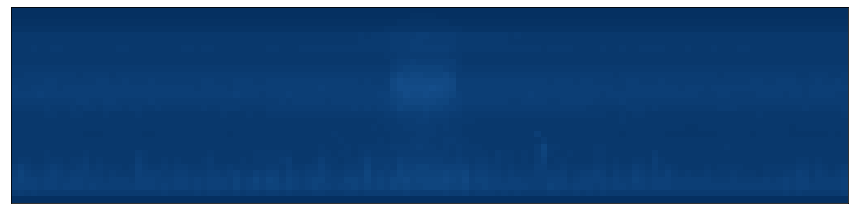

In [254]:

paper_latent_space_analysis(No_Conv_Images, "Little Convection", idn)

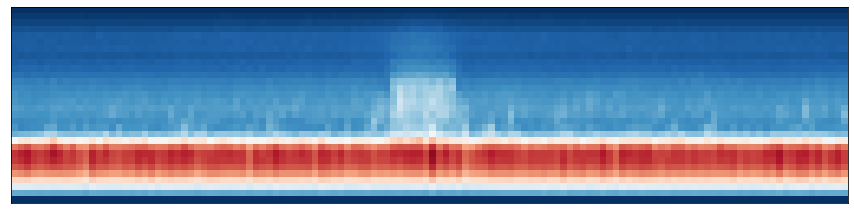

In [255]:
paper_latent_space_analysis(Shallow_Conv_Images, "Shallow Convection", idn)

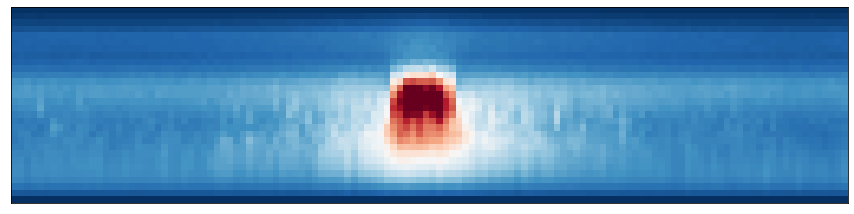

In [256]:
paper_latent_space_analysis(Deep_Conv_Images, "Deep Convection", idn)

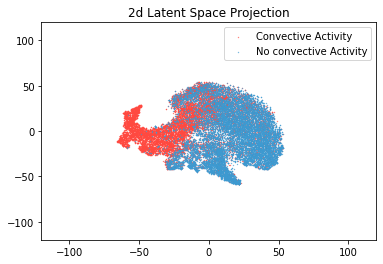

In [54]:
convection = np.squeeze(z_test_tsne[np.where(other_test_labels == 0),:])
no_convection = np.squeeze(z_test_tsne[np.where(other_test_labels == 1),:])
plt.scatter(x=convection[:, 0], y=convection[:, 1], c="#FF4940", s=0.1, label="Convective Activity")
plt.scatter(x=no_convection[:, 0], y=no_convection[:, 1], c="#3D9AD1", s=0.1, label="No convective Activity")
plt.legend()
plt.title("2d Latent Space Projection")
plt.xlim(-120, 120)
plt.ylim(-120, 120)
print(" ")

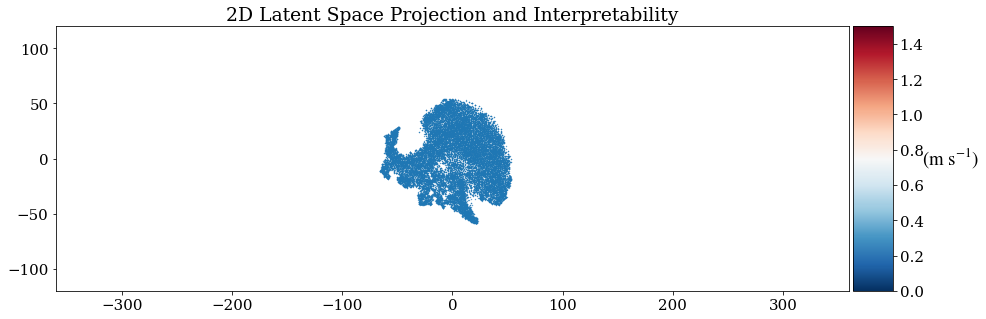

In [257]:
Dummy_Images = Test_Images[2:4,:,:]
Dummy_Images = np.mean(Dummy_Images, axis = 0)
Dummy_Images[:,:] = np.nan
fz = 15
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement


plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

fig, ax = plt.subplots(1,1, figsize=(15,5))

cmap="RdBu_r"

cbar = ax.imshow(Dummy_Images, cmap=cmap, vmin=0, vmax=1.5)
#plt.gca().set_visible(False)
ax.scatter(x=z_test_tsne[:, 0], y=z_test_tsne[:, 1], cmap=cmap, vmin = 0, vmax = 1.5, s=0.1, label="Convective Activity")
ax.set_title("2D Latent Space Projection and Interpretability", fontsize = fz*1.25)
plt.xlim(-360, 360)
plt.ylim(-120, 120)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(cbar, cax=cax)
cbar.set_label(r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize = fz*1.25, labelpad=27, y=0.55)

print(" ")

In [57]:
Pure_TNSE = np.load("Saved_Data/Pure_TSNE_Latent_Space.npy")

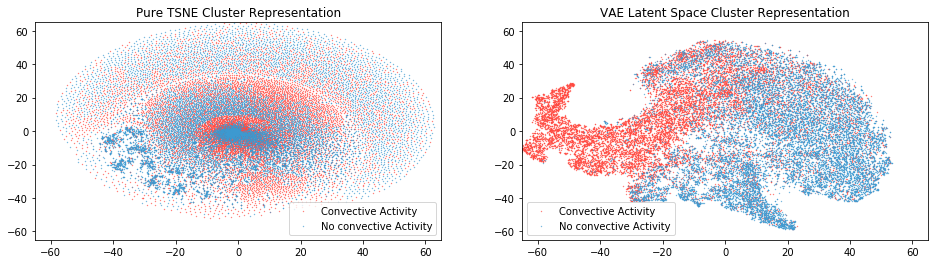

In [74]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

convection = np.squeeze(Pure_TNSE[np.where(other_test_labels == 0),:])
no_convection = np.squeeze(Pure_TNSE[np.where(other_test_labels == 1),:])
ax[0].scatter(x=convection[:, 0], y=convection[:, 1], c="#FF4940", s=0.1, label="Convective Activity")
ax[0].scatter(x=no_convection[:, 0], y=no_convection[:, 1], c="#3D9AD1", s=0.1, label="No convective Activity")
ax[0].legend()
ax[0].set_title("Pure TSNE Cluster Representation")
ax[0].set_xlim(-65, 65)
ax[0].set_ylim(-65, 65)
#plt.xlim(-120, 120)
#plt.ylim(-120, 120)

convection = np.squeeze(z_test_tsne[np.where(other_test_labels == 0),:])
no_convection = np.squeeze(z_test_tsne[np.where(other_test_labels == 1),:])
ax[1].scatter(x=convection[:, 0], y=convection[:, 1], c="#FF4940", s=0.1, label="Convective Activity")
ax[1].scatter(x=no_convection[:, 0], y=no_convection[:, 1], c="#3D9AD1", s=0.1, label="No convective Activity")
ax[1].legend()
ax[1].set_title("VAE Latent Space Cluster Representation")
ax[1].set_xlim(-65, 65)
ax[1].set_ylim(-65, 65)
print(" ")

In [8]:
original_samples = np.load("CI_Figure_Data/True_Means.npy")
recon_means = np.load("CI_Figure_Data/Reconstruct_Means.npy")

vmin_true = np.min(original_samples)#, recon_means)
vmax_true = np.max(original_samples)#, recon_means)
vmin_pred = np.min(recon_means)#, recon_means)
vmax_pred = np.max(recon_means)#, recon_means)
vmin = min(vmin_true, vmin_pred)
vmax = max(vmax_true, vmax_pred)

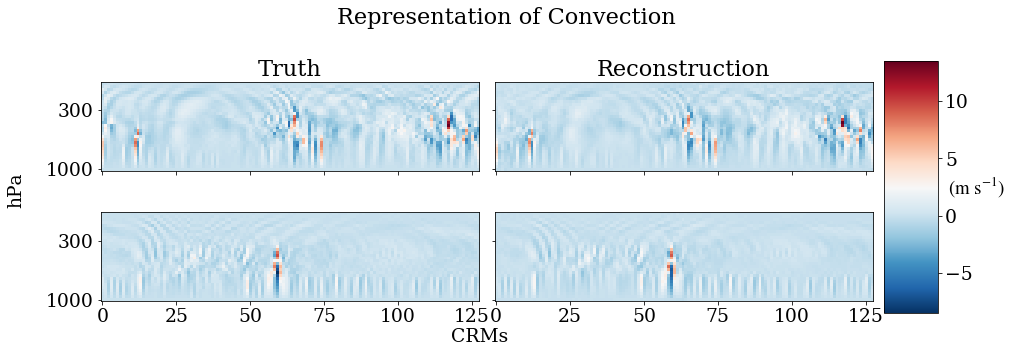

In [60]:
fz = 15*1.25
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

y_ticks = np.arange(1700, -40000, -700)

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw


fig, ax = plt.subplots(2,2, figsize=(15,5))


ax[0,0].imshow(np.squeeze(original_samples[0,:,:]), cmap='RdBu_r', vmin = vmin, vmax=vmax)
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
labels = [item.get_text() for item in ax[0,0].get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax[0,0].set_xticklabels(empty_string_labels)
ax[0,0].set_yticklabels(y_ticks)
#h = ax[0,0].set_ylabel("Truths")
#h.set_rotation(0)
#ax[0,0].yaxis.set_label_coords(-0.2,0.35)
ax[0,0].set_title("Truth")

ax[0,1].imshow(np.squeeze(recon_means[0,:,:]), cmap='RdBu_r', vmin = vmin, vmax=vmax)
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
labels = [item.get_text() for item in ax[0,1].get_yticklabels()]
empty_string_labels = ['']*len(labels)
ax[0,1].set_yticklabels(empty_string_labels)
labels = [item.get_text() for item in ax[0,1].get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax[0,1].set_xticklabels(empty_string_labels)
ax[0,1].set_title("Reconstruction")

ax[1,0].imshow(np.squeeze(original_samples[1,:,:]), cmap='RdBu_r', vmin = vmin, vmax=vmax)
ax[1,0].set_ylim(ax[1,0].get_ylim()[::-1])
ax[1,0].set_yticklabels(y_ticks)
h = ax[1,0].set_ylabel("hPa")
#h.set_rotation(0)
ax[1,0].yaxis.set_label_coords(-0.2,1.25)
ax[1,0].set_xlabel("CRMs")
ax[1,0].xaxis.set_label_coords(1.0,-0.3)

cbar = ax[1,1].imshow(np.squeeze(recon_means[1,:,:]), cmap='RdBu_r', vmin = vmin, vmax=vmax)
ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
labels = [item.get_text() for item in ax[1,1].get_yticklabels()]
empty_string_labels = ['']*len(labels)
ax[1,1].set_yticklabels(empty_string_labels)

plt.suptitle("Representation of Convection", y=1.0001)
fig.subplots_adjust(top=0.85, right=0.84)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(cbar, cax=cbar_ax)
cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", y = 0.55)
plt.subplots_adjust(wspace=0.04, hspace=0.001)
plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Reconstructions.png")
plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Reconstructions.pdf")
print(" ")
